In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pytz
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
df_NYC_Motor = pd.read_csv('NYC_Motor.csv')
df_NYC_Motor

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,BODILY_INJURY,SAFETY_EQUIPMENT,PERSON_SEX,PERSON_TYPE,PED_LOCATION,CONTRIBUTING_FACTOR_2,...,COMPLAINT,EMOTIONAL_STATUS,VEHICLE_ID,PERSON_ID,CONTRIBUTING_FACTOR_1,POSITION_IN_VEHICLE,PED_ROLE,UNIQUE_ID,PED_ACTION,COLLISION_ID
0,2021-05-02,21:00,Killed,62.0,Head,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,...,Severe Bleeding,Apparent Death,NaN,f2f329b6-2dfc-4bd0-b751-2e4255f1ea06,Traffic Control Disregarded,NaN,Pedestrian,11791937,Crossing Against Signal,4412948
1,2021-05-21,0:00,Killed,24.0,Entire Body,Air Bag Deployed,M,Occupant,NaN,NaN,...,Internal,Apparent Death,19986231.0,e27e12a2-0485-4e22-b692-3f8a765d2582,NaN,Driver,Driver,11819198,NaN,4419608
2,2021-10-15,2:00,Killed,30.0,Head,None,M,Occupant,NaN,NaN,...,Internal,Apparent Death,20091024.0,1a6f5aa7-5125-4be2-8499-fe7977cb0d90,NaN,Driver,Driver,11998317,NaN,4467504
3,2021-04-17,13:00,Killed,71.0,Head,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,...,Internal,Unconscious,NaN,b950706b-00a4-485c-84c5-777208cc3cc9,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11745791,"Crossing, No Signal, or Crosswalk",4408062
4,2021-05-25,22:00,Killed,69.0,Entire Body,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,...,None Visible,Conscious,NaN,6504ea0a-c92d-444c-8127-284943be9aac,Unspecified,NaN,Pedestrian,11991283,"Crossing, No Signal, Marked Crosswalk",4420918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45664,2021-05-07,0:00,Injured,24.0,Back,Lap Belt & Harness,M,Occupant,NaN,NaN,...,Complaint of Pain or Nausea,Conscious,19988552.0,051c2721-1533-4f48-bda4-273bd3725242,NaN,Driver,Driver,11823105,NaN,4414130
45665,2021-04-27,13:00,Injured,29.0,Knee-Lower Leg Foot,Lap Belt & Harness,M,Occupant,NaN,NaN,...,Complaint of Pain or Nausea,Conscious,19966687.0,017e3824-4cbe-409a-ba57-e741923a60a1,NaN,Driver,Driver,11785808,NaN,4411119
45666,2021-05-07,14:00,Injured,7.0,Head,Child Restraint Only,F,Occupant,NaN,NaN,...,Complaint of Pain or Nausea,Conscious,19951136.0,c70e93ff-cb5f-4e15-b888-0f17a1ede0cd,NaN,"Left rear passenger, or rear passenger on a bi...",Passenger,11758963,NaN,4415414
45667,2021-05-10,16:00,Injured,13.0,Elbow-Lower-Arm-Hand,None,F,Occupant,NaN,NaN,...,Complaint of Pain or Nausea,Conscious,19991766.0,bb039a41-8563-493b-9fd1-a5bcd15fbb33,NaN,Right rear passenger or motorcycle sidecar pas...,Passenger,11828495,NaN,4415201


In [3]:
df_NYC_Motor.describe()

,PERSON_AGE,VEHICLE_ID,UNIQUE_ID,COLLISION_ID
count,45248.000000,3.909800e+04,4.566900e+04,4.566900e+04
mean,37.487646,1.999663e+07,1.183588e+07,4.431737e+06
std,81.492032,7.940981e+04,1.375828e+05,2.753403e+04
min,-971.000000,1.982197e+07,1.153725e+07,4.380715e+06
25%,25.000000,1.996078e+07,1.177289e+07,4.408781e+06
50%,34.000000,2.000877e+07,1.185680e+07,4.432358e+06
75%,48.000000,2.005868e+07,1.194421e+07,4.455395e+06
max,9999.000000,2.010992e+07,1.203146e+07,4.478832e+06


In [4]:
df_NYC_Motor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45669 entries, 0 to 45668
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CRASH_DATE             45669 non-null  object 
 1   CRASH_TIME             45669 non-null  object 
 2   PERSON_INJURY          45669 non-null  object 
 3   PERSON_AGE             45248 non-null  float64
 4   BODILY_INJURY          45669 non-null  object 
 5   SAFETY_EQUIPMENT       39434 non-null  object 
 6   PERSON_SEX             45669 non-null  object 
 7   PERSON_TYPE            45669 non-null  object 
 8   PED_LOCATION           6571 non-null   object 
 9   CONTRIBUTING_FACTOR_2  6546 non-null   object 
 10  EJECTION               39429 non-null  object 
 11  COMPLAINT              45669 non-null  object 
 12  EMOTIONAL_STATUS       45669 non-null  object 
 13  VEHICLE_ID             39098 non-null  float64
 14  PERSON_ID              45669 non-null  object 
 15  CO

In [5]:
df_NYC_Motor.columns

Index(['CRASH_DATE', 'CRASH_TIME', 'PERSON_INJURY', 'PERSON_AGE',
       'BODILY_INJURY', 'SAFETY_EQUIPMENT', 'PERSON_SEX', 'PERSON_TYPE',
       'PED_LOCATION', 'CONTRIBUTING_FACTOR_2', 'EJECTION', 'COMPLAINT',
       'EMOTIONAL_STATUS', 'VEHICLE_ID', 'PERSON_ID', 'CONTRIBUTING_FACTOR_1',
       'POSITION_IN_VEHICLE', 'PED_ROLE', 'UNIQUE_ID', 'PED_ACTION',
       'COLLISION_ID'],
      dtype='object')

In [6]:
df_NYC_Motor.columns.values

array(['CRASH_DATE', 'CRASH_TIME', 'PERSON_INJURY', 'PERSON_AGE',
       'BODILY_INJURY', 'SAFETY_EQUIPMENT', 'PERSON_SEX', 'PERSON_TYPE',
       'PED_LOCATION', 'CONTRIBUTING_FACTOR_2', 'EJECTION', 'COMPLAINT',
       'EMOTIONAL_STATUS', 'VEHICLE_ID', 'PERSON_ID',
       'CONTRIBUTING_FACTOR_1', 'POSITION_IN_VEHICLE', 'PED_ROLE',
       'UNIQUE_ID', 'PED_ACTION', 'COLLISION_ID'], dtype=object)

In [7]:
df_NYC_Motor.isnull().sum()

CRASH_DATE                   0
CRASH_TIME                   0
PERSON_INJURY                0
PERSON_AGE                 421
BODILY_INJURY                0
SAFETY_EQUIPMENT          6235
PERSON_SEX                   0
PERSON_TYPE                  0
PED_LOCATION             39098
CONTRIBUTING_FACTOR_2    39123
EJECTION                  6240
COMPLAINT                    0
EMOTIONAL_STATUS             0
VEHICLE_ID                6571
PERSON_ID                    0
CONTRIBUTING_FACTOR_1    39111
POSITION_IN_VEHICLE       6221
PED_ROLE                     0
UNIQUE_ID                    0
PED_ACTION               39098
COLLISION_ID                 0
dtype: int64

In [8]:
df_NYC_Motor.isna().sum()

CRASH_DATE                   0
CRASH_TIME                   0
PERSON_INJURY                0
PERSON_AGE                 421
BODILY_INJURY                0
SAFETY_EQUIPMENT          6235
PERSON_SEX                   0
PERSON_TYPE                  0
PED_LOCATION             39098
CONTRIBUTING_FACTOR_2    39123
EJECTION                  6240
COMPLAINT                    0
EMOTIONAL_STATUS             0
VEHICLE_ID                6571
PERSON_ID                    0
CONTRIBUTING_FACTOR_1    39111
POSITION_IN_VEHICLE       6221
PED_ROLE                     0
UNIQUE_ID                    0
PED_ACTION               39098
COLLISION_ID                 0
dtype: int64

In [9]:
df_NYC_Motor.T

,0,1,2,3,4,5,6,7,8,9,...,45659,45660,45661,45662,45663,45664,45665,45666,45667,45668
CRASH_DATE,2021-05-02,2021-05-21,2021-10-15,2021-04-17,2021-05-25,2021-04-08,2021-01-14,2021-01-20,2021-09-04,2021-05-03,...,2021-03-20,2021-04-15,2021-06-06,2021-05-10,2021-04-29,2021-05-07,2021-04-27,2021-05-07,2021-05-10,2021-11-09
CRASH_TIME,21:00,0:00,2:00,13:00,22:00,23:00,15:00,19:00,14:00,23:00,...,18:00,11:00,9:00,16:00,22:00,0:00,13:00,14:00,16:00,13:00
PERSON_INJURY,Killed,Killed,Killed,Killed,Killed,Killed,Killed,Killed,Killed,Killed,...,Injured,Injured,Injured,Injured,Injured,Injured,Injured,Injured,Injured,Injured
PERSON_AGE,62.0,24.0,30.0,71.0,69.0,43.0,81.0,60.0,52.0,21.0,...,22.0,43.0,37.0,31.0,47.0,24.0,29.0,7.0,13.0,29.0
BODILY_INJURY,Head,Entire Body,Head,Head,Entire Body,Head,Entire Body,Chest,Entire Body,Head,...,Back,Neck,Back,Elbow-Lower-Arm-Hand,Knee-Lower Leg Foot,Back,Knee-Lower Leg Foot,Head,Elbow-Lower-Arm-Hand,Shoulder - Upper Arm
SAFETY_EQUIPMENT,NaN,Air Bag Deployed,None,NaN,NaN,NaN,NaN,NaN,Unknown,Lap Belt & Harness,...,None,Lap Belt & Harness,Lap Belt & Harness,Unknown,NaN,Lap Belt & Harness,Lap Belt & Harness,Child Restraint Only,None,Lap Belt & Harness
PERSON_SEX,F,M,M,M,F,M,M,M,M,M,...,M,M,M,M,F,M,M,F,F,M
PERSON_TYPE,Pedestrian,Occupant,Occupant,Pedestrian,Pedestrian,Pedestrian,Pedestrian,Pedestrian,Occupant,Occupant,...,Occupant,Occupant,Occupant,Other Motorized,Pedestrian,Occupant,Occupant,Occupant,Occupant,Occupant
PED_LOCATION,Pedestrian/Bicyclist/Other Pedestrian at Inter...,NaN,NaN,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Pedestrian/Bicyclist/Other Pedestrian Not at I...,NaN,NaN,...,NaN,NaN,NaN,NaN,Pedestrian/Bicyclist/Other Pedestrian at Inter...,NaN,NaN,NaN,NaN,NaN
CONTRIBUTING_FACTOR_2,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,NaN,Unspecified,Unspecified,Unspecified,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,Unspecified,NaN,NaN,...,NaN,NaN,NaN,NaN,Unspecified,NaN,NaN,NaN,NaN,NaN


In [10]:
df_NYC_util = df_NYC_Motor.loc[:,["CRASH_DATE", "CRASH_TIME", "PERSON_INJURY", "PERSON_AGE", "PERSON_SEX", "PERSON_TYPE", "BODILY_INJURY", "COMPLAINT", "EJECTION", "EMOTIONAL_STATUS", "PED_ROLE", "COLLISION_ID"]].set_index('CRASH_DATE')
df_NYC_util

,CRASH_TIME,PERSON_INJURY,PERSON_AGE,PERSON_SEX,PERSON_TYPE,BODILY_INJURY,COMPLAINT,EJECTION,EMOTIONAL_STATUS,PED_ROLE,COLLISION_ID
CRASH_DATE,,,,,,,,,,,
2021-05-02,21:00,Killed,62.0,F,Pedestrian,Head,Severe Bleeding,NaN,Apparent Death,Pedestrian,4412948
2021-05-21,0:00,Killed,24.0,M,Occupant,Entire Body,Internal,Trapped,Apparent Death,Driver,4419608
2021-10-15,2:00,Killed,30.0,M,Occupant,Head,Internal,Not Ejected,Apparent Death,Driver,4467504
2021-04-17,13:00,Killed,71.0,M,Pedestrian,Head,Internal,NaN,Unconscious,Pedestrian,4408062
2021-05-25,22:00,Killed,69.0,F,Pedestrian,Entire Body,None Visible,NaN,Conscious,Pedestrian,4420918
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-07,0:00,Injured,24.0,M,Occupant,Back,Complaint of Pain or Nausea,Not Ejected,Conscious,Driver,4414130
2021-04-27,13:00,Injured,29.0,M,Occupant,Knee-Lower Leg Foot,Complaint of Pain or Nausea,Not Ejected,Conscious,Driver,4411119
2021-05-07,14:00,Injured,7.0,F,Occupant,Head,Complaint of Pain or Nausea,Not Ejected,Conscious,Passenger,4415414


In [11]:
df_NYC_util.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45669 entries, 2021-05-02 to 2021-11-09
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CRASH_TIME        45669 non-null  object 
 1   PERSON_INJURY     45669 non-null  object 
 2   PERSON_AGE        45248 non-null  float64
 3   PERSON_SEX        45669 non-null  object 
 4   PERSON_TYPE       45669 non-null  object 
 5   BODILY_INJURY     45669 non-null  object 
 6   COMPLAINT         45669 non-null  object 
 7   EJECTION          39429 non-null  object 
 8   EMOTIONAL_STATUS  45669 non-null  object 
 9   PED_ROLE          45669 non-null  object 
 10  COLLISION_ID      45669 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 4.2+ MB


In [12]:
df_NYC_util.dropna(inplace=True)

In [13]:
df_NYC_util.isna().sum()

CRASH_TIME          0
PERSON_INJURY       0
PERSON_AGE          0
PERSON_SEX          0
PERSON_TYPE         0
BODILY_INJURY       0
COMPLAINT           0
EJECTION            0
EMOTIONAL_STATUS    0
PED_ROLE            0
COLLISION_ID        0
dtype: int64

In [14]:
df_NYC_util.sort_values(by = 'CRASH_DATE', ascending=True)

,CRASH_TIME,PERSON_INJURY,PERSON_AGE,PERSON_SEX,PERSON_TYPE,BODILY_INJURY,COMPLAINT,EJECTION,EMOTIONAL_STATUS,PED_ROLE,COLLISION_ID
CRASH_DATE,,,,,,,,,,,
2021-01-01,18:00,Injured,25.0,F,Occupant,Back,Complaint of Pain or Nausea,Not Ejected,Conscious,Driver,4381389
2021-01-01,5:00,Injured,45.0,F,Occupant,Back,Complaint of Pain or Nausea,Not Ejected,Conscious,Passenger,4380764
2021-01-01,21:00,Injured,39.0,F,Occupant,Shoulder - Upper Arm,Complaint of Pain or Nausea,Not Ejected,Conscious,Driver,4380874
2021-01-01,19:00,Injured,36.0,M,Bicyclist,Face,Minor Bleeding,Ejected,Conscious,Driver,4381296
2021-01-01,14:00,Injured,21.0,M,Occupant,Back,None Visible,Not Ejected,Conscious,Driver,4380816
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-16,8:00,Injured,40.0,M,Bicyclist,Entire Body,Complaint of Pain or Nausea,Not Ejected,Conscious,Driver,4477923
2021-11-16,9:00,Injured,34.0,M,Occupant,Back,Complaint of Pain or Nausea,Not Ejected,Conscious,Driver,4477998
2021-11-16,7:00,Injured,21.0,M,Other Motorized,Hip-Upper Leg,Complaint of Pain or Nausea,Not Ejected,Conscious,Driver,4478377


In [15]:
df_NYC_util.reset_index(inplace=True)
crash_datetime = df_NYC_util['CRASH_DATE'] + " "+ df_NYC_util['CRASH_TIME']
df_NYC_util["CRASH_DATETIME"] = pd.to_datetime(crash_datetime)
df_NYC_util.set_index("CRASH_DATETIME", inplace=True)
df_NYC_util

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,PERSON_SEX,PERSON_TYPE,BODILY_INJURY,COMPLAINT,EJECTION,EMOTIONAL_STATUS,PED_ROLE,COLLISION_ID
CRASH_DATETIME,,,,,,,,,,,,
2021-05-21 00:00:00,2021-05-21,0:00,Killed,24.0,M,Occupant,Entire Body,Internal,Trapped,Apparent Death,Driver,4419608
2021-10-15 02:00:00,2021-10-15,2:00,Killed,30.0,M,Occupant,Head,Internal,Not Ejected,Apparent Death,Driver,4467504
2021-09-04 14:00:00,2021-09-04,14:00,Killed,52.0,M,Occupant,Entire Body,Internal,Not Ejected,Unconscious,Driver,4453643
2021-05-03 23:00:00,2021-05-03,23:00,Killed,21.0,M,Occupant,Head,Internal,Not Ejected,Unconscious,Driver,4413273
2021-06-12 16:00:00,2021-06-12,16:00,Killed,57.0,M,Occupant,Unknown,Unknown,Not Ejected,Apparent Death,Driver,4427132
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-07 00:00:00,2021-05-07,0:00,Injured,24.0,M,Occupant,Back,Complaint of Pain or Nausea,Not Ejected,Conscious,Driver,4414130
2021-04-27 13:00:00,2021-04-27,13:00,Injured,29.0,M,Occupant,Knee-Lower Leg Foot,Complaint of Pain or Nausea,Not Ejected,Conscious,Driver,4411119
2021-05-07 14:00:00,2021-05-07,14:00,Injured,7.0,F,Occupant,Head,Complaint of Pain or Nausea,Not Ejected,Conscious,Passenger,4415414


In [16]:
df_NYC_util.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39147 entries, 2021-05-21 00:00:00 to 2021-11-09 13:00:00
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CRASH_DATE        39147 non-null  object 
 1   CRASH_TIME        39147 non-null  object 
 2   PERSON_INJURY     39147 non-null  object 
 3   PERSON_AGE        39147 non-null  float64
 4   PERSON_SEX        39147 non-null  object 
 5   PERSON_TYPE       39147 non-null  object 
 6   BODILY_INJURY     39147 non-null  object 
 7   COMPLAINT         39147 non-null  object 
 8   EJECTION          39147 non-null  object 
 9   EMOTIONAL_STATUS  39147 non-null  object 
 10  PED_ROLE          39147 non-null  object 
 11  COLLISION_ID      39147 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 3.9+ MB


In [17]:
df_NYC_util["PERSON_INJURY"].nunique()

2

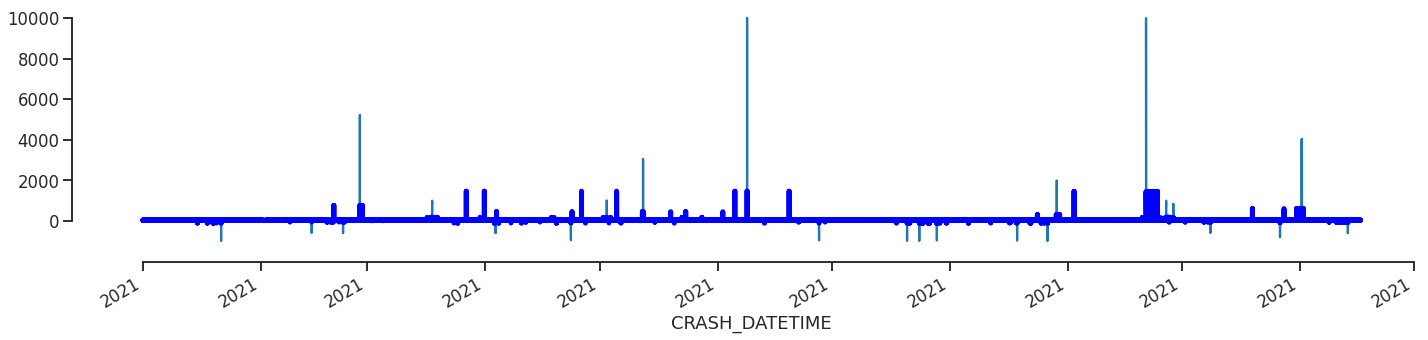

In [18]:
def plot_series(series):
    sns.set_context("talk")
    sns.set_style("ticks")

    fig, ax = plt.subplots(1, 1, figsize=(24, 5))
    ax = series.plot(ax = ax)
    ax.yaxis.grid(True)
    sns.despine(offset=10, trim=True)
    return ax

ax = plot_series(df_NYC_util.PERSON_AGE)
df_NYC_util.PERSON_AGE.rolling(7).mean().plot(ax=ax, c='b', lw=5)

In [19]:
df_NYC_sitacao = df_NYC_util['PERSON_INJURY']
df_NYC_sitacao

CRASH_DATETIME
2021-05-21 00:00:00     Killed
2021-10-15 02:00:00     Killed
2021-09-04 14:00:00     Killed
2021-05-03 23:00:00     Killed
2021-06-12 16:00:00     Killed
                        ...   
2021-05-07 00:00:00    Injured
2021-04-27 13:00:00    Injured
2021-05-07 14:00:00    Injured
2021-05-10 16:00:00    Injured
2021-11-09 13:00:00    Injured
Name: PERSON_INJURY, Length: 39147, dtype: object

In [20]:
df_NYC_util.iloc[:,4]

CRASH_DATETIME
2021-05-21 00:00:00    M
2021-10-15 02:00:00    M
2021-09-04 14:00:00    M
2021-05-03 23:00:00    M
2021-06-12 16:00:00    M
                      ..
2021-05-07 00:00:00    M
2021-04-27 13:00:00    M
2021-05-07 14:00:00    F
2021-05-10 16:00:00    F
2021-11-09 13:00:00    M
Name: PERSON_SEX, Length: 39147, dtype: object

In [21]:
label_encoder_teste = LabelEncoder()
df_NYC_util.iloc[:,2]
df_NYC_util.iloc[:,4]
teste = label_encoder_teste.fit_transform(df_NYC_util.iloc[:,2])
teste_2 = label_encoder_teste.fit_transform(df_NYC_util.iloc[:,4])

In [22]:
teste

array([1, 1, 1, ..., 0, 0, 0])

In [23]:
teste_2

array([1, 1, 1, ..., 0, 0, 1])

In [24]:
df_NYC_util["PERSON_INJURY_BIN"] = teste
df_NYC_util["PERSON_SEX_BIN"] = teste_2
df_NYC_util

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,PERSON_SEX,PERSON_TYPE,BODILY_INJURY,COMPLAINT,EJECTION,EMOTIONAL_STATUS,PED_ROLE,COLLISION_ID,PERSON_INJURY_BIN,PERSON_SEX_BIN
CRASH_DATETIME,,,,,,,,,,,,,,
2021-05-21 00:00:00,2021-05-21,0:00,Killed,24.0,M,Occupant,Entire Body,Internal,Trapped,Apparent Death,Driver,4419608,1,1
2021-10-15 02:00:00,2021-10-15,2:00,Killed,30.0,M,Occupant,Head,Internal,Not Ejected,Apparent Death,Driver,4467504,1,1
2021-09-04 14:00:00,2021-09-04,14:00,Killed,52.0,M,Occupant,Entire Body,Internal,Not Ejected,Unconscious,Driver,4453643,1,1
2021-05-03 23:00:00,2021-05-03,23:00,Killed,21.0,M,Occupant,Head,Internal,Not Ejected,Unconscious,Driver,4413273,1,1
2021-06-12 16:00:00,2021-06-12,16:00,Killed,57.0,M,Occupant,Unknown,Unknown,Not Ejected,Apparent Death,Driver,4427132,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-07 00:00:00,2021-05-07,0:00,Injured,24.0,M,Occupant,Back,Complaint of Pain or Nausea,Not Ejected,Conscious,Driver,4414130,0,1
2021-04-27 13:00:00,2021-04-27,13:00,Injured,29.0,M,Occupant,Knee-Lower Leg Foot,Complaint of Pain or Nausea,Not Ejected,Conscious,Driver,4411119,0,1
2021-05-07 14:00:00,2021-05-07,14:00,Injured,7.0,F,Occupant,Head,Complaint of Pain or Nausea,Not Ejected,Conscious,Passenger,4415414,0,0


In [25]:
df_NYC_util.sort_values(by = 'CRASH_DATE', ascending=True)

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,PERSON_SEX,PERSON_TYPE,BODILY_INJURY,COMPLAINT,EJECTION,EMOTIONAL_STATUS,PED_ROLE,COLLISION_ID,PERSON_INJURY_BIN,PERSON_SEX_BIN
CRASH_DATETIME,,,,,,,,,,,,,,
2021-01-01 18:00:00,2021-01-01,18:00,Injured,25.0,F,Occupant,Back,Complaint of Pain or Nausea,Not Ejected,Conscious,Driver,4381389,0,0
2021-01-01 05:00:00,2021-01-01,5:00,Injured,45.0,F,Occupant,Back,Complaint of Pain or Nausea,Not Ejected,Conscious,Passenger,4380764,0,0
2021-01-01 21:00:00,2021-01-01,21:00,Injured,39.0,F,Occupant,Shoulder - Upper Arm,Complaint of Pain or Nausea,Not Ejected,Conscious,Driver,4380874,0,0
2021-01-01 19:00:00,2021-01-01,19:00,Injured,36.0,M,Bicyclist,Face,Minor Bleeding,Ejected,Conscious,Driver,4381296,0,1
2021-01-01 14:00:00,2021-01-01,14:00,Injured,21.0,M,Occupant,Back,None Visible,Not Ejected,Conscious,Driver,4380816,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-16 08:00:00,2021-11-16,8:00,Injured,40.0,M,Bicyclist,Entire Body,Complaint of Pain or Nausea,Not Ejected,Conscious,Driver,4477923,0,1
2021-11-16 09:00:00,2021-11-16,9:00,Injured,34.0,M,Occupant,Back,Complaint of Pain or Nausea,Not Ejected,Conscious,Driver,4477998,0,1
2021-11-16 07:00:00,2021-11-16,7:00,Injured,21.0,M,Other Motorized,Hip-Upper Leg,Complaint of Pain or Nausea,Not Ejected,Conscious,Driver,4478377,0,1


In [26]:
df_NYC_util.PERSON_SEX

CRASH_DATETIME
2021-05-21 00:00:00    M
2021-10-15 02:00:00    M
2021-09-04 14:00:00    M
2021-05-03 23:00:00    M
2021-06-12 16:00:00    M
                      ..
2021-05-07 00:00:00    M
2021-04-27 13:00:00    M
2021-05-07 14:00:00    F
2021-05-10 16:00:00    F
2021-11-09 13:00:00    M
Name: PERSON_SEX, Length: 39147, dtype: object

In [27]:
df_NYC_util["PERSON_SEX"].nunique()

3

In [28]:
df_NYC_util_FM = df_NYC_util[(df_NYC_util.PERSON_SEX == 'F') | (df_NYC_util.PERSON_SEX == 'M')]
df_NYC_util_FM

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,PERSON_SEX,PERSON_TYPE,BODILY_INJURY,COMPLAINT,EJECTION,EMOTIONAL_STATUS,PED_ROLE,COLLISION_ID,PERSON_INJURY_BIN,PERSON_SEX_BIN
CRASH_DATETIME,,,,,,,,,,,,,,
2021-05-21 00:00:00,2021-05-21,0:00,Killed,24.0,M,Occupant,Entire Body,Internal,Trapped,Apparent Death,Driver,4419608,1,1
2021-10-15 02:00:00,2021-10-15,2:00,Killed,30.0,M,Occupant,Head,Internal,Not Ejected,Apparent Death,Driver,4467504,1,1
2021-09-04 14:00:00,2021-09-04,14:00,Killed,52.0,M,Occupant,Entire Body,Internal,Not Ejected,Unconscious,Driver,4453643,1,1
2021-05-03 23:00:00,2021-05-03,23:00,Killed,21.0,M,Occupant,Head,Internal,Not Ejected,Unconscious,Driver,4413273,1,1
2021-06-12 16:00:00,2021-06-12,16:00,Killed,57.0,M,Occupant,Unknown,Unknown,Not Ejected,Apparent Death,Driver,4427132,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-07 00:00:00,2021-05-07,0:00,Injured,24.0,M,Occupant,Back,Complaint of Pain or Nausea,Not Ejected,Conscious,Driver,4414130,0,1
2021-04-27 13:00:00,2021-04-27,13:00,Injured,29.0,M,Occupant,Knee-Lower Leg Foot,Complaint of Pain or Nausea,Not Ejected,Conscious,Driver,4411119,0,1
2021-05-07 14:00:00,2021-05-07,14:00,Injured,7.0,F,Occupant,Head,Complaint of Pain or Nausea,Not Ejected,Conscious,Passenger,4415414,0,0


In [29]:
df_NYC_util_FM.drop(df_NYC_util_FM[df_NYC_util_FM.PERSON_AGE > 100].index, axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [30]:
df_NYC_util_FM.drop(df_NYC_util_FM[df_NYC_util_FM.PERSON_AGE <= 0].index, axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


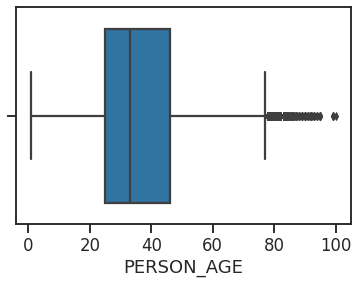

In [31]:
sns.boxplot(df_NYC_util_FM['PERSON_AGE'])

In [32]:
df_NYC_util_FM_Plot = px.box(df_NYC_util_FM, y='PERSON_AGE')
df_NYC_util_FM_Plot.show()

In [33]:
df_NYC_util_Graf_2 = pd.DataFrame(df_NYC_util.resample('W')['PERSON_INJURY_BIN'].sum())
df_NYC_util_Graf_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2021-01-03 to 2021-11-21
Freq: W-SUN
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   PERSON_INJURY_BIN  47 non-null     int64
dtypes: int64(1)
memory usage: 752.0 bytes


In [34]:
df_NYC_util_Graf_3 = pd.DataFrame(df_NYC_util.resample('W')['PERSON_SEX_BIN'].sum())
df_NYC_util_Graf_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2021-01-03 to 2021-11-21
Freq: W-SUN
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   PERSON_SEX_BIN  47 non-null     int64
dtypes: int64(1)
memory usage: 752.0 bytes


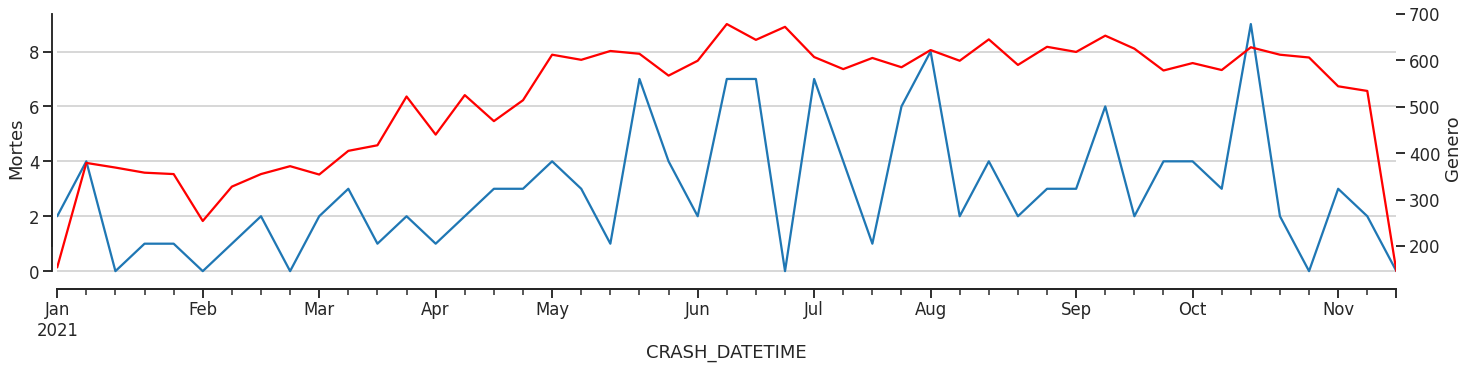

In [35]:
ax = plot_series(df_NYC_util_Graf_2.PERSON_INJURY_BIN)
ax.set_ylabel("Mortes")
ax2 = ax.twinx()

df_NYC_util_Graf_3.PERSON_SEX_BIN.plot(ax=ax2, c="r")
ax2.set_ylabel("Genero")

sns.despine(trim=True, offset=5)


In [36]:
df_graf = df_NYC_util_FM.groupby(['CRASH_DATE', 'PERSON_INJURY', 'PERSON_SEX'])['PERSON_AGE'].agg('mean')
df_graf

CRASH_DATE  PERSON_INJURY  PERSON_SEX
2021-01-01  Injured        F             39.607143
                           M             32.327586
            Killed         F             60.000000
                           M             57.000000
2021-01-02  Injured        F             32.413793
                                           ...    
2021-11-14  Killed         M             28.000000
2021-11-15  Injured        F             41.108108
                           M             39.157143
2021-11-16  Injured        F             33.684211
                           M             37.567164
Name: PERSON_AGE, Length: 750, dtype: float64

In [37]:
df_NYC_util_FM['PERSON_AGE'].max()

100.0

In [38]:
df_NYC_util_FM_copy = df_NYC_util_FM[df_NYC_util_FM['PERSON_INJURY'] == 'Killed']
df_NYC_util_FM_copy

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,PERSON_SEX,PERSON_TYPE,BODILY_INJURY,COMPLAINT,EJECTION,EMOTIONAL_STATUS,PED_ROLE,COLLISION_ID,PERSON_INJURY_BIN,PERSON_SEX_BIN
CRASH_DATETIME,,,,,,,,,,,,,,
2021-05-21 00:00:00,2021-05-21,0:00,Killed,24.0,M,Occupant,Entire Body,Internal,Trapped,Apparent Death,Driver,4419608,1,1
2021-10-15 02:00:00,2021-10-15,2:00,Killed,30.0,M,Occupant,Head,Internal,Not Ejected,Apparent Death,Driver,4467504,1,1
2021-09-04 14:00:00,2021-09-04,14:00,Killed,52.0,M,Occupant,Entire Body,Internal,Not Ejected,Unconscious,Driver,4453643,1,1
2021-05-03 23:00:00,2021-05-03,23:00,Killed,21.0,M,Occupant,Head,Internal,Not Ejected,Unconscious,Driver,4413273,1,1
2021-06-12 16:00:00,2021-06-12,16:00,Killed,57.0,M,Occupant,Unknown,Unknown,Not Ejected,Apparent Death,Driver,4427132,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-21 08:00:00,2021-08-21,8:00,Killed,23.0,M,Occupant,Head,Internal,Ejected,Unconscious,Driver,4451296,1,1
2021-05-22 04:00:00,2021-05-22,4:00,Killed,30.0,M,Occupant,Entire Body,Crush Injuries,Not Ejected,Unconscious,Driver,4419561,1,1
2021-07-28 04:00:00,2021-07-28,4:00,Killed,32.0,M,Occupant,Head,Severe Bleeding,Not Ejected,Apparent Death,Driver,4441354,1,1


In [39]:
df_NYC_util_FM_copy['PERSON_INJURY'].count()

136

In [40]:
fig = px.line(df_graf.reset_index(), x='CRASH_DATE', y='PERSON_AGE', title='Histórico de mortes por idade', color='PERSON_SEX')
fig.show()

In [41]:
df_kill = df_graf.reset_index(inplace=False)
#df_kill.set_index('CRASH_DATE', inplace=True)
df_kill_fem = df_kill[(df_kill.PERSON_SEX == 'F')]
df_kill_fem

,CRASH_DATE,PERSON_INJURY,PERSON_SEX,PERSON_AGE
0,2021-01-01,Injured,F,39.607143
2,2021-01-01,Killed,F,60.000000
4,2021-01-02,Injured,F,32.413793
6,2021-01-03,Injured,F,31.709677
8,2021-01-04,Injured,F,42.531250
...,...,...,...,...
739,2021-11-12,Injured,F,35.360000
741,2021-11-13,Injured,F,33.266667
743,2021-11-14,Injured,F,37.311111
746,2021-11-15,Injured,F,41.108108


In [42]:
df_kill_fem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 0 to 748
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CRASH_DATE     337 non-null    object 
 1   PERSON_INJURY  337 non-null    object 
 2   PERSON_SEX     337 non-null    object 
 3   PERSON_AGE     337 non-null    float64
dtypes: float64(1), object(3)
memory usage: 13.2+ KB


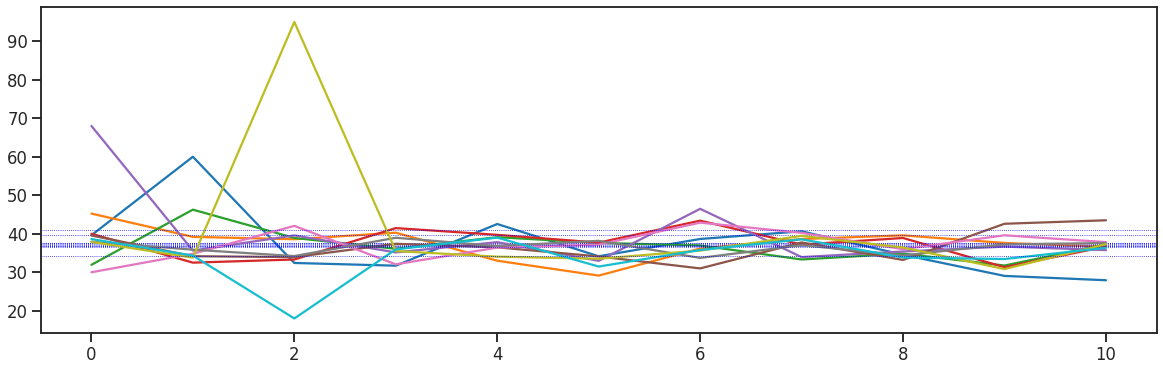

In [43]:
fig, ax = plt.subplots(1, 1, figsize= (20, 6))

for idx in range(10):
    from_date = (idx * 12 )
    to_date = ((idx+1) * 12 - 1)
    values = df_kill_fem["PERSON_AGE"].iloc[from_date:to_date ].values
    ax.plot(values)
    ax.axhline(y=np.mean(values), color="b", lw=.8, ls=":")

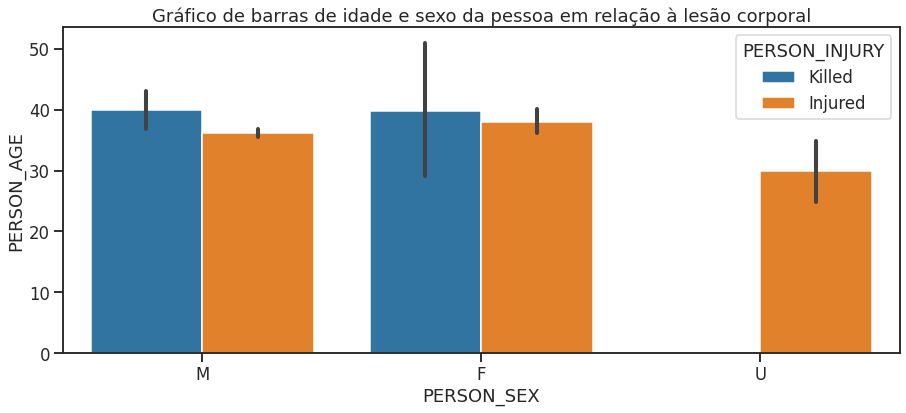

In [44]:
# fonte: https://www.kaggle.com/code/everydaycodings/eda-on-nyc-motor-vehicle-collisions-to-person
plt.figure(figsize=(15,6))
sns.barplot(x="PERSON_SEX", y= "PERSON_AGE", hue="PERSON_INJURY", data=df_NYC_util)
plt.title('Gráfico de barras de idade e sexo da pessoa em relação à lesão corporal')
plt.show()

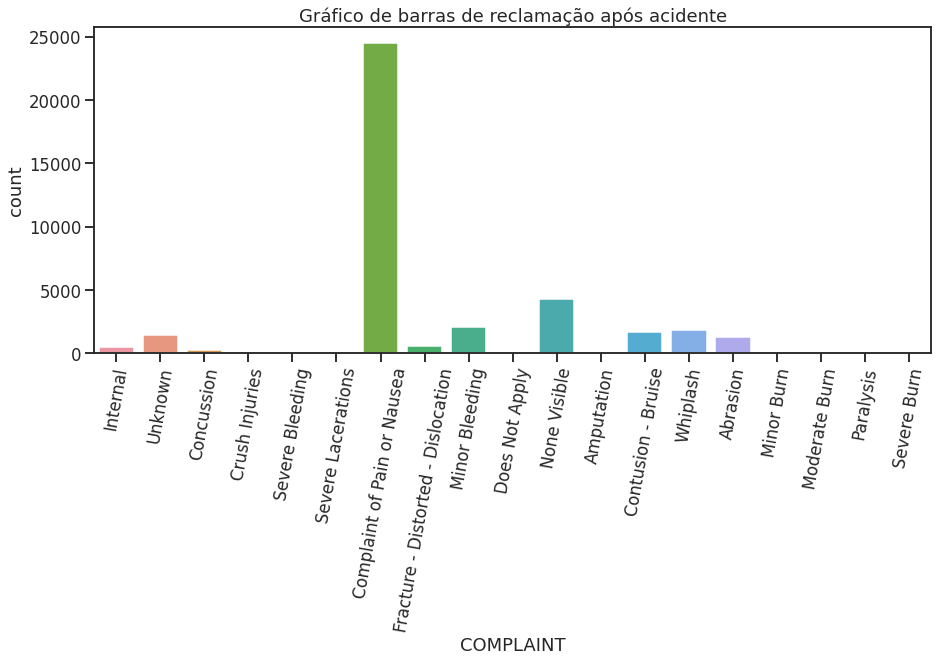

In [45]:
# fonte: https://www.kaggle.com/code/everydaycodings/eda-on-nyc-motor-vehicle-collisions-to-person
plt.figure(figsize=(15,6))
sns.countplot(x="COMPLAINT", data=df_NYC_util)
plt.title('Gráfico de barras de reclamação após acidente')
plt.xticks(rotation=80)
plt.show()

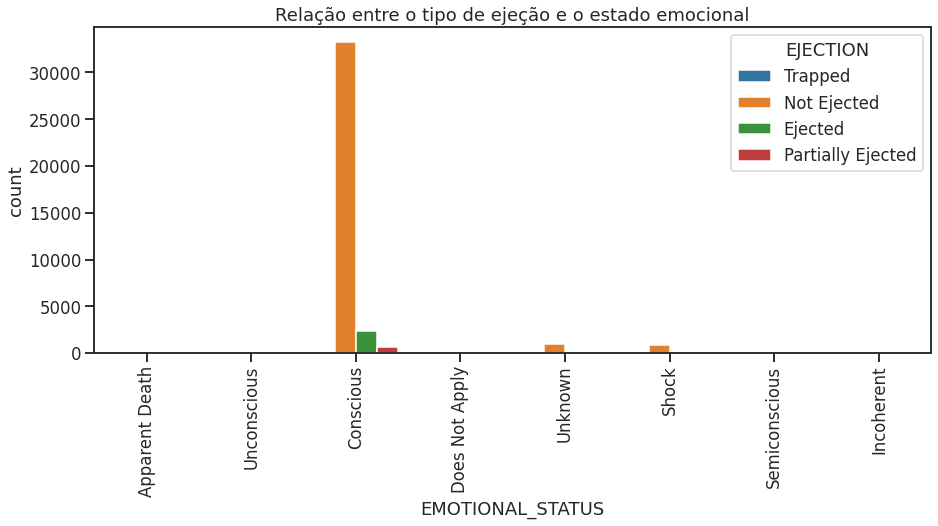

In [46]:
# fonte: https://www.kaggle.com/code/everydaycodings/eda-on-nyc-motor-vehicle-collisions-to-person
plt.figure(figsize=(15,6))
sns.countplot(x= "EMOTIONAL_STATUS", hue="EJECTION", data=df_NYC_util)
plt.title('Relação entre o tipo de ejeção e o estado emocional')
plt.xticks(rotation=90)
plt.show()

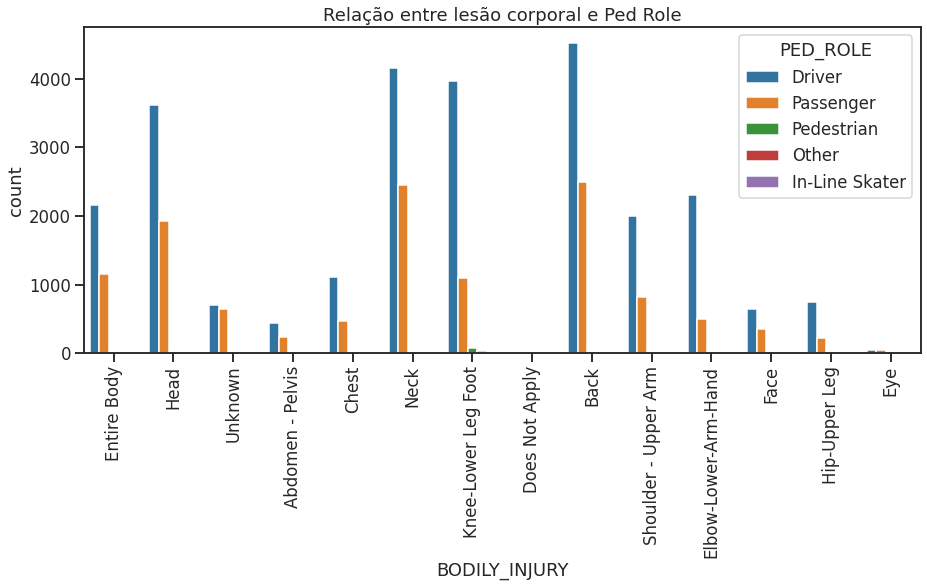

In [47]:
# fonte: https://www.kaggle.com/code/everydaycodings/eda-on-nyc-motor-vehicle-collisions-to-person
plt.figure(figsize=(15,6))
sns.countplot(x= "BODILY_INJURY", hue="PED_ROLE", data=df_NYC_util)
plt.title('Relação entre lesão corporal e Ped Role')
plt.xticks(rotation=90)
plt.show()

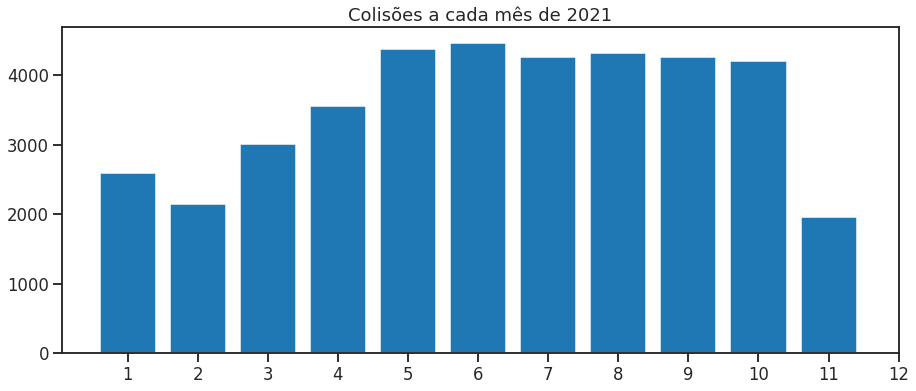

In [48]:
# fonte: https://www.kaggle.com/code/everydaycodings/eda-on-nyc-motor-vehicle-collisions-to-person
plt.figure(figsize=(15,6))
df_NYC_util['CRASH_DATE'] = pd.to_datetime(df_NYC_util['CRASH_DATE'], errors='coerce')
df_NYC_util_month = df_NYC_util['CRASH_DATE'].dt.month.value_counts().sort_index()
plt.bar(df_NYC_util_month.index,df_NYC_util_month.values)
plt.title('Colisões a cada mês de 2021')
plt.xticks(range(1,13))
plt.show()

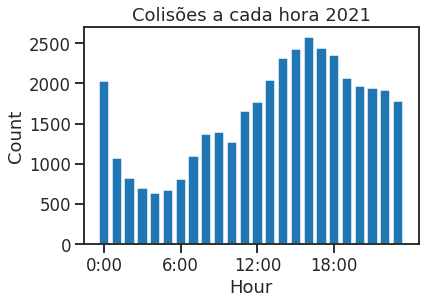

In [49]:
# fonte: https://www.kaggle.com/code/everydaycodings/eda-on-nyc-motor-vehicle-collisions-to-person
df_NYC_util_dfp = df_NYC_util['CRASH_TIME'].str.split(':').str[0].astype('int').value_counts().sort_index()
plt.bar(df_NYC_util_dfp.index, df_NYC_util_dfp.values)

plt.xticks(range(0,24,6),[str(x)+":00" for x in range(0,24,6)])
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Colisões a cada hora 2021')
plt.show()